# Homework 2 - Microlensing, Transits, RVs
Lorraine Nicholson

## Problem 3
### (a) First, let’s use the velocity of the planet in its orbit. We can approximate the transit duration as the time it takes the planet to travel 2Rstar at the time of transit– why is this? Use your planet velocity at θ = 0 to approximate what the duration should be (I recommend using the vis viva equation).

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [304]:
#My code from homework 1:

#Constants
G = 6.67e-8                    #cgs
M_star = 1.989e33              #grams

#Choose some values for a, e, and time
a = 0.7*1.496e+13              #number of AU [cm]
e = 0.29
time_stop = 0.6*3.154e+7       #number of year [s]
#dt = time_stop/100
dt = 86400                     #1 days [s]
dt=1000


#Initial conditions
r_initial = a*(1-e)
t_initial = 0
theta_initial = 0

#Create lists for later
r,theta,time = [r_initial], [theta_initial], [t_initial]
dtheta = [theta_initial]

#Total angular momentum
curlyL = np.sqrt(G*M_star*a*(1-e**2))

# Iterative process
while t_initial < time_stop:
    
    #Update quantities
    dTheta = (curlyL/r_initial**2) * dt
    theta_initial += dTheta
    r_initial = (a * (1-e**2)) / (1 + e*np.cos(theta_initial))
    t_initial += dt
    
    #Save quantities
    dtheta.append(dTheta)
    theta.append(theta_initial)
    r.append(r_initial)
    time.append(t_initial)

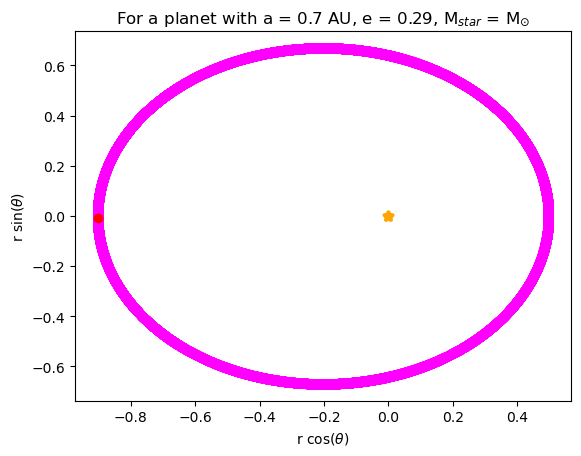

In [305]:
# Plotting
plt.scatter(np.array(r)/1.496e+13*np.cos(theta), np.array(r)/1.496e+13*np.sin(theta), color='magenta')
plt.scatter(0,0,marker="*", color='orange', linewidth=3)
do=9300
plt.scatter(np.array(r)[do]/1.496e+13*np.cos(theta)[do], np.array(r)[do]/1.496e+13*np.sin(theta)[do], color='red')

plt.xlabel('r cos($\u03b8$)')
plt.ylabel('r sin($\u03b8$)')
plt.title('For a planet with a = '+str(a/1.496e+13)+' AU, e = '+str(e)+', M$_{star}$ = M$_{\odot}$');

In [189]:
r = np.array(r)            #cm
theta = np.array(theta)    #radians
time = np.array(time)      #s
dtheta = np.array(dtheta)

The vis viva equation explains the orbital velocity of a planet on an eccentric orbit:

$$
v^2 = GM(\frac{2}{r}-\frac{1}{a})
$$

where r is the distance between the planet and the star, in this case I will consider r at periapse. And a is the semi-major axis of the orbit


In [100]:
r[0]/1.496e+13 #distance from star to planet at periapse [AU]

0.497

In [101]:
r[0] #distance from star to planet at periapse [cm]

7435120000000.0

In [102]:
# Find the orbital velocity of the planet at periapse using the vis viva equation

#Constants
G = 6.67e-8                    #Gravitational constant [cgs]
M_star = 1.989e33              #Mass of Sun [grams]
R_star = 6.96e10               #Radius of sun [cm]

#Other important values
a = 0.7*1.496e+13              #semi-major axis chosen arbitratily [cm]
r_periapse = r[0]              #[cm]

velocity = np.sqrt(G*M_star*(2/r_periapse - 1/a))     #[cm/s]
velocity


4797678.839037288

We know that in general,
$$
velocity = \frac{distance}{time}
$$
so,
$$
time = \frac{distance}{velocity}
$$

In [103]:
# Determine the distance the planet needs to travel for one transit
transit_length = 2*R_star      #[cm]

# Calculate transit time
transit_time = transit_length/velocity
transit_time

print('Transit time is about ',transit_time,'s.')


Transit time is about  29014.0304656016 s.


### (b) Second, we should determine where in the orbit the +/- ry components of the planet’s position are equal to Rstar. Make your timestep in your code, ∆t, small enough that you get at least 10 measurements of ry that are less than or equal to Rstar when the planet is near transit. You’ll want to make sure rx is positive when you do this– otherwise you’ll mix up transit (when the planet is passing in front of the star) with eclipse (when the planet is passing behind the star)! When you get at least 10 measurements of the planet’s orbit during transit, figure out the maximum and minimum time when ry < Rstar. Is this similar to your estimate from (a)?

In [124]:
import pandas as pd

In [156]:
# Convert from polar to cartesian coordinates
r_y = np.array(r)*np.sin(theta)          #[cm]
r_x = np.array(r)*np.cos(theta)          #[cm]


In [157]:
# Make a data frame of relavent values
d = {'ry': r_y, 'rx': r_x, 'time': time}
df = pd.DataFrame(data=d)
df

,ry,rx,time
0,0.000000e+00,7.435120e+12,0
1,4.797679e+09,7.435119e+12,1000
2,9.595356e+09,7.435115e+12,2000
3,1.439303e+10,7.435109e+12,3000
4,1.919070e+10,7.435101e+12,4000
...,...,...,...
18920,2.061153e+12,7.211258e+12,18920000
18921,2.065807e+12,7.210235e+12,18921000
18922,2.070461e+12,7.209210e+12,18922000
18923,2.075114e+12,7.208182e+12,18923000


In [158]:
# Chop away at the data frame based on the constraints given in the prompt
df_new = df[np.absolute(df['ry']) < R_star] #absolute value of ry less than r_star
df_new
df_new = df_new[df_new['rx'] > 0] #rx should be positive
df_new

,ry,rx,time
0,0.000000e+00,7.435120e+12,0
1,4.797679e+09,7.435119e+12,1000
2,9.595356e+09,7.435115e+12,2000
3,1.439303e+10,7.435109e+12,3000
4,1.919070e+10,7.435101e+12,4000
5,2.398837e+10,7.435090e+12,5000
6,2.878602e+10,7.435077e+12,6000
7,3.358367e+10,7.435061e+12,7000
8,3.838131e+10,7.435043e+12,8000
9,4.317894e+10,7.435023e+12,9000


In [181]:
# Now I can calculate the time of transit based on this
t_transit = 2*(df_new['time'][14] - df_new['time'][1])
print('Transit time = ', t_transit, 's')
print('This is very similar to what I found in part a.')

Transit time =  26000 s
This is very similar to what I found in part a.


### (c) Third, use the equation for transit duration in the Seager textbook (Equation 14 in the “Transits and Occultations” chapter) to calculate the duration exactly. How much faster is this, compared to the transit duration if the orbit were circular?

The textbook equation for transit duration is,
$$
T_{tot} = \frac{P}{\pi} sin^{-1}[\frac{R_{star}}{a} \frac{\sqrt{(1+k)^2 - b^2}}{sin(i)}]
$$

where $k = R_p/R_{star}$ and b is the impact parameter in units of R$_{star}$ given by,

$$
b = \frac{acos(i)}{R_{star}}(\frac{1-e^2}{1+e sin(\omega)})
$$

Typically, I think $\omega = \frac{\Delta \theta}{\Delta t}$

In [300]:
# Need to calculate some things for the equation
a = 0.7                               #AU
period = np.sqrt(a**3)                #period [years]
period_sec = period*3.154e+7          #period [s]
R_planet = 6.3e8                      #radius of Earth [cm]
k = R_planet/R_star
i = 90 * np.pi/180.                   #assume edge on [radians]
b = 0 

# Now find the transit duration
#T_tot = period_sec/np.pi * np.arcsin(R_star/a * np.sqrt((1+k)**2 - b**2)/np.sin(i))
T_tot = period_sec/np.pi*np.arcsin((R_star/(a*1.496e+13))*(1+k))
T_tot

print('\nTransit time = ',T_tot,'s')
print('This is a slower transit than my answer from part a and b.')


Transit time =  39432.577610149885 s
This is a slower transit than my answer from part a and b.


### (d) In your code, Rotate the orientation of the planet by π radians, so that now apoapse is pointed toward the viewer. Use any of the three methods above to determine the transit duration. 

### Imagine that you have the ability to measure the transit duration of an exoplanet to a precision of 10%. How eccentric would the planet need to be, in order for you to know for sure that the eccentricity is >0? (That is, how eccentric would the planet need to be in order for Tecc > 1.1Tcirc?). 
### Why would it be much harder to infer e > 0 for a transiting planet if periapse is pointed toward the viewer? (Using transit durations to constrain eccentricity is a neat trick that was first proposed to the community in a 2012 paper by Bekki Dawson, now a professor at Penn State, and John Johnson, now a professor at Harvard).

#### I'm going to recreate what I did for part a except now at apoapse,

In [267]:
# Find the orbital velocity of the planet at apoapse using the vis viva equation

#Constants
G = 6.67e-8                    #Gravitational constant [cgs]
M_star = 1.989e33              #Mass of Sun [grams]
R_star = 6.96e10               #Radius of sun [cm]

#Other important values
a = 0.7*1.496e+13              #semi-major axis chosen arbitratily [cm]
r_apoapse = r[9300]            #[cm]: planet first aproached apoapse and index = 9300 (based on visual inspection)


velocity = np.sqrt(G*M_star*(2/r_apoapse - 1/a))     #[cm/s]
velocity



2640679.126981227

In [306]:
# Determine the distance the planet needs to travel for one transit
transit_length = 2*R_star      #[cm]

# Calculate transit time
transit_time = transit_length/velocity
transit_time

print('Transit time is about ',transit_time,'s.')
print('Transit is slower at apoapse then at periapse, makes sense.')

Transit time is about  52713.7123847117 s.
Transit is slower at apoapse then at periapse, makes sense.


#### Now I will look into how the transit duration would be different if I had a circular orbit,

In [307]:
# Investigate a circular orbit
#My code from homework 1:

#Constants
G = 6.67e-8                    #cgs
M_star = 1.989e33              #grams

#Choose some values for a, e, and time
a = 0.7*1.496e+13              #number of AU [cm]
e = 0.0
time_stop = 0.6*3.154e+7       #number of year [s]
#dt = time_stop/100
dt = 86400                     #1 days [s]
dt=1000


#Initial conditions
r_initial = a*(1-e)
t_initial = 0
theta_initial = 0

#Create lists for later
r,theta,time = [r_initial], [theta_initial], [t_initial]
dtheta = [theta_initial]

#Total angular momentum
curlyL = np.sqrt(G*M_star*a*(1-e**2))

# Iterative process
while t_initial < time_stop:
    
    #Update quantities
    dTheta = (curlyL/r_initial**2) * dt
    theta_initial += dTheta
    r_initial = (a * (1-e**2)) / (1 + e*np.cos(theta_initial))
    t_initial += dt
    
    #Save quantities
    dtheta.append(dTheta)
    theta.append(theta_initial)
    r.append(r_initial)
    time.append(t_initial)

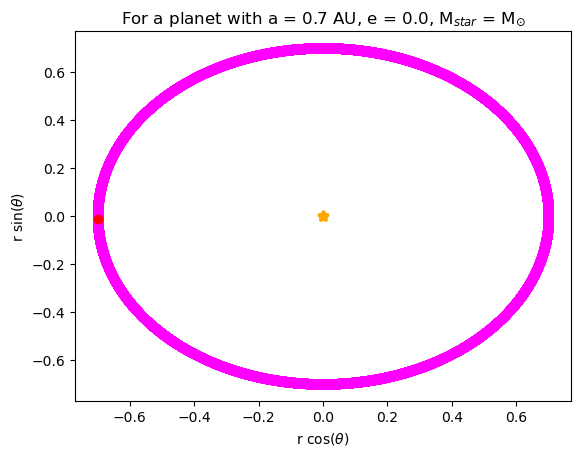

In [308]:
# Plotting
plt.scatter(np.array(r)/1.496e+13*np.cos(theta), np.array(r)/1.496e+13*np.sin(theta), color='magenta')
plt.scatter(0,0,marker="*", color='orange', linewidth=3)
do=9300
plt.scatter(np.array(r)[do]/1.496e+13*np.cos(theta)[do], np.array(r)[do]/1.496e+13*np.sin(theta)[do], color='red')

plt.xlabel('r cos($\u03b8$)')
plt.ylabel('r sin($\u03b8$)')
plt.title('For a planet with a = '+str(a/1.496e+13)+' AU, e = '+str(e)+', M$_{star}$ = M$_{\odot}$');

In [309]:
# Find the orbital velocity of the planet at apoapse using the vis viva equation

#Constants
G = 6.67e-8                    #Gravitational constant [cgs]
M_star = 1.989e33              #Mass of Sun [grams]
R_star = 6.96e10               #Radius of sun [cm]

#Other important values
a = 0.7*1.496e+13              #semi-major axis chosen arbitratily [cm]
r_apoapse = r[9300]            #[cm]: planet first aproached apoapse and index = 9300 (based on visual inspection)


velocity = np.sqrt(G*M_star*(2/r_apoapse - 1/a))     #[cm/s]
velocity


3559307.352725925

In [313]:
# Determine the distance the planet needs to travel for one transit
transit_length = 2*R_star      #[cm]

# Calculate transit time
transit_time = transit_length/velocity
transit_time

print('Circular orbit transit time is about ',transit_time,'s.')
print('\nThe transit duration for a circular orbit is about 1.34 times faster than for the eccentric orbit.')

Circular orbit transit time is about  39108.73274076557 s.

The transit duration for a circular orbit is about 1.34 times faster than for the eccentric orbit.


It's much easier to infer eccentricity when the planet is transiting at apoapse because this is the slowest part of the orbit. At periapse there is too much degeneracy about what could "slow down" the orbit to be able to tell if eccentricity is having an effect.